In [24]:
import openturns as ot
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

In [25]:
def psi(n, a, eps):
    return (1-a-eps)*np.log( (1-a-eps)/(1-a) ) + (a+eps)*np.log( (a+eps)/a )

def our_bound(n, alpha, eps):
    return 1 - np.exp( -n*psi(n, alpha, eps))

def wilks_bound(n, a, eps):
    # B = ot.Binomial(n, a)
    j = n*(a+eps)
    # return B.computeCDF(j)
    return scs.binom.cdf(j, n, a)


In [76]:
n = 3000

a = 0.95
eps = 0.01

print(wilks_bound(n, a, eps)-our_bound(n, a, eps))
print(3000*0.96+1)


0.029797997528199893
2881.0


In [38]:
plt.style.use('seaborn-v0_8')

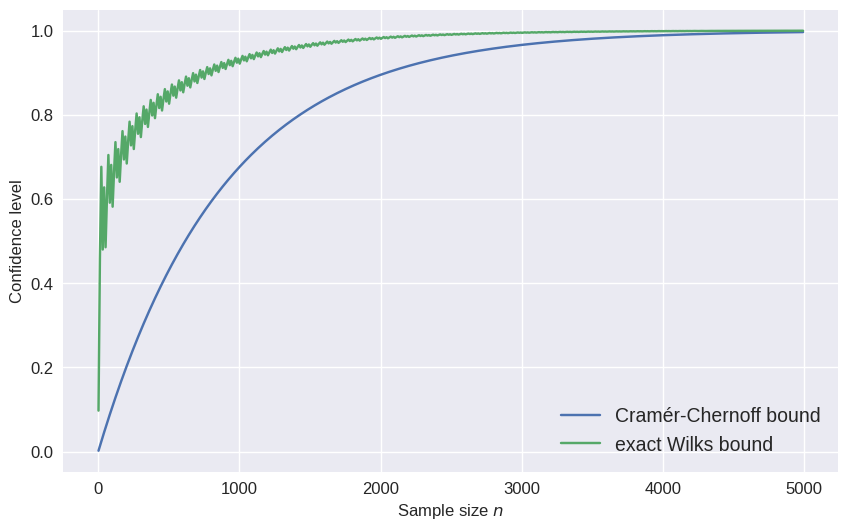

In [74]:
N = np.arange(2, 5000, 10)

a = 0.95
eps = 0.01

ours = [our_bound(n, a, eps) for n in N]
wilks = [wilks_bound(n, a, eps) for n in N]

plt.figure(figsize=(10, 6))

plt.plot(N, ours, label="Cramér-Chernoff bound")#, color='darkblue')
plt.plot(N, wilks, label="exact Wilks bound")# , color="darkred")
plt.tick_params('x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r"Sample size $n$", fontsize=12)
plt.ylabel("Confidence level", fontsize=12)
plt.grid(True)
plt.legend(fontsize=14)
#plt.savefig("/home/bketema/PhD-Manuscript/figures/chap_NACI_comparison_Wilks_vs_Cramer.pdf")